<a href="https://colab.research.google.com/github/lenessvi/zadaniya-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ Практика 2: Статистика в действии и её влияние на модель

## **Цель занятия:**
Изучить, как статистические метрики (среднее, медиана, квантили, размер выборки, стандартное отклонение) влияют на анализ данных и построение моделей машинного обучения. На практике мы проведем анализ целевой переменной **Y**, обучим модель линейной регрессии и исследуем влияние статистических характеристик на метрики модели.

## **Задание состоит из следующих частей:**
1. Анализ целевой переменной **Y** с точки зрения статистики. (в нашем случае - бинарная классификация)
2. Анализ пропусков
2. Изучение влияния статистических метрик на данные.
3. Обучение модели линейной регрессии и оценка ее точности.
4. Проведение теста Пирсона.
5. Визуализация результатов и анализ влияния статистики на метрики модели.
6. Валидация модели
---

## 1. Анализ целевой переменной Y с точки зрения статистики

### **Описание:**
В этом разделе вы проведете статистический анализ целевой переменной **Y**, изучите ее распределение и основные статистические характеристики.

1. **Импортируйте необходимые библиотеки:**

In [ ]:
!pip install pandas scikit-learn seaborn scipy

In [ ]:
   import pandas as pd
   import numpy as np
   import matplotlib.pyplot as plt
   import seaborn as sns
   from scipy import stats

2. **Загружаем набор данных:**

In [ ]:
# Загрузка набора данных
df = pd.read_csv('/content/employee.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low,1
14995,0.37,0.48,2,160,3,0,0,support,low,1
14996,0.37,0.53,2,143,3,0,0,support,low,1
14997,0.11,0.96,6,280,4,0,0,support,low,1


In [ ]:
# для удобства распечатаем все колонки
for column in df.columns:
  print(f'колонка: {column}')

колонка: satisfaction_level
колонка: last_evaluation
колонка: number_project
колонка: average_montly_hours
колонка: time_spend_company
колонка: Work_accident
колонка: promotion_last_5years
колонка: department
колонка: salary
колонка: left


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


3. **Проверьте наличие пропущенных значений и работа с пропусками для числовых:**

In [ ]:
# Проверка на пропущенные значения
print(df.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'average_montly_hours'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     5
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 1: Удаление строк с пропусками
df_drop = df_test_nan.dropna()
print("\n# Удаление строк с пропусками")
print(df.isnull().sum()) # пропусков нет


# Удаление строк с пропусками
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 2: Заполнение пропусков медианой
df_median = df_test_nan.copy()
df_median.average_montly_hours = df_median.average_montly_hours.fillna(df_median.average_montly_hours.median())

print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum()) # пропусков нет


# Заполнение пропусков медианой
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
# Вариант 3: Заполнение пропусков средним
df_mean = df_test_nan.copy()
df_mean.average_montly_hours = df_mean.average_montly_hours.fillna(df_median.average_montly_hours.mean())

print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum()) # пропусков нет


# Заполнение пропусков средним
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


⏰ Заполнение категориальных признаков происходит с помощью ```df.category_variable.mode() (как один из вариантов, хотя и считается недостаточно хорошим).```

Как вариант - можно использовать KNN (K-ближайших соедей)

In [ ]:
# генерируем случайную последовательность
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'number_project'] = np.nan

In [ ]:
# Проверка на пропущенные значения
print(df_test_nan.isnull().sum()) # пропусков нет

satisfaction_level       0
last_evaluation          0
number_project           5
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64


In [ ]:
df_mode = df_test_nan.copy()
df_mode['number_project'] = df_mode['number_project'].fillna(df_mode['number_project'].mode()[0])
print("\n# Заполнение пропусков с помощью df.category_variable.mode()")
print(df_mode.isnull().sum()) # пропусков нет


# Заполнение пропусков с помощью df.category_variable.mode()
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
rich_people              0
dtype: int64


4. **Выбираем целвую переменную**

⏰ В качестве целевой выбираем категориальную переменную, либо превращаем числовую в категориальное

```В моем датасете была выбрана целевая переменная is_best_wine -> которая была преобразована из quality (если качество >= 7, то вино считается лучшим, иначе не лучшее)```

In [ ]:
df['rich_people'] = np.where(df['salary'] == 'high', 1, 0).astype(int)

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left', 'rich_people'],
      dtype='object')

In [ ]:
Y = df['rich_people'] # выбираем целевую переменную (категориальную)
X = df.drop('rich_people', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('salary', axis=1)

5. **Графический анализ**

In [ ]:
# Список числовых колонок для построения графиков
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,1
14995,0.37,0.48,2,160,3,0,0,1
14996,0.37,0.53,2,143,3,0,0,1
14997,0.11,0.96,6,280,4,0,0,1


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


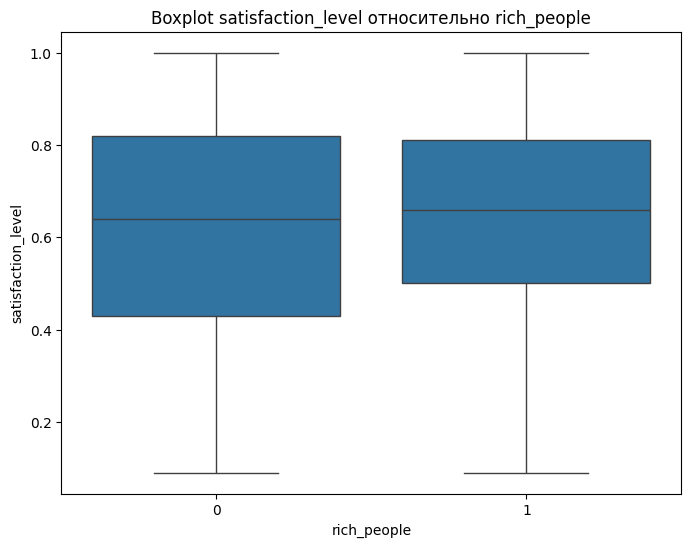

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


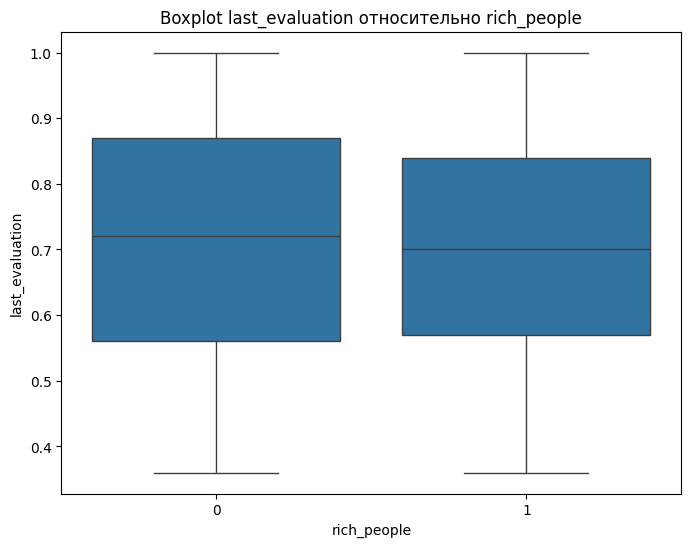

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


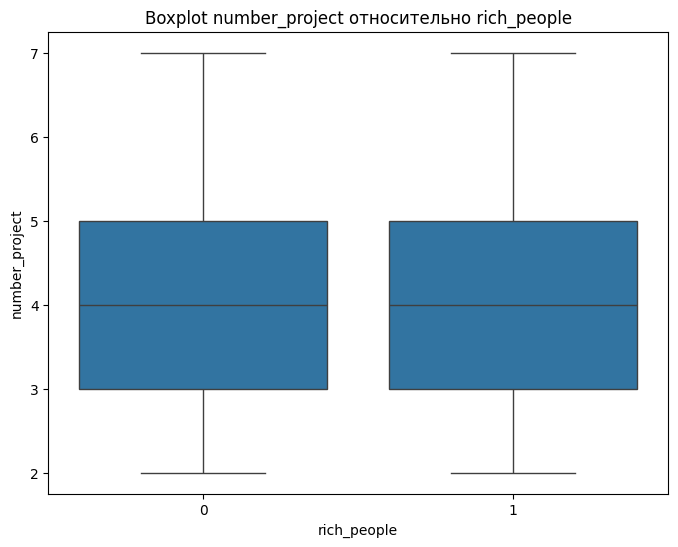

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


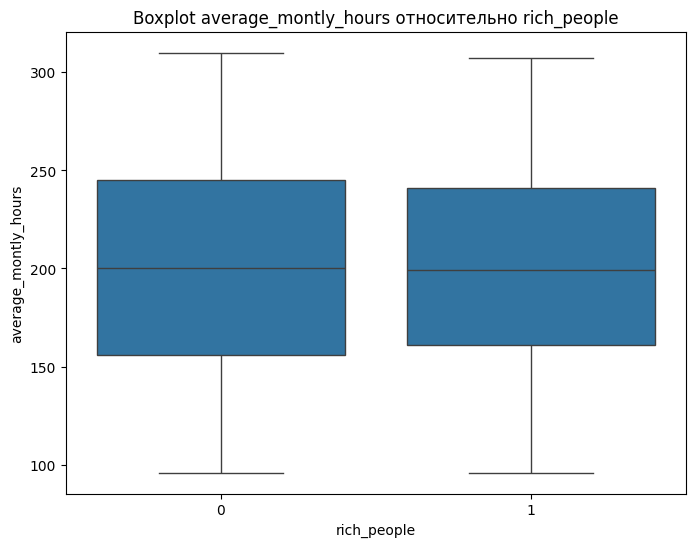

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


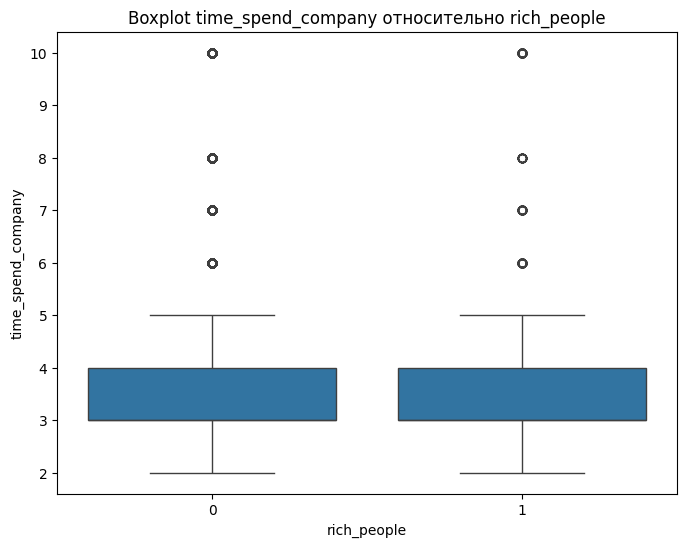

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


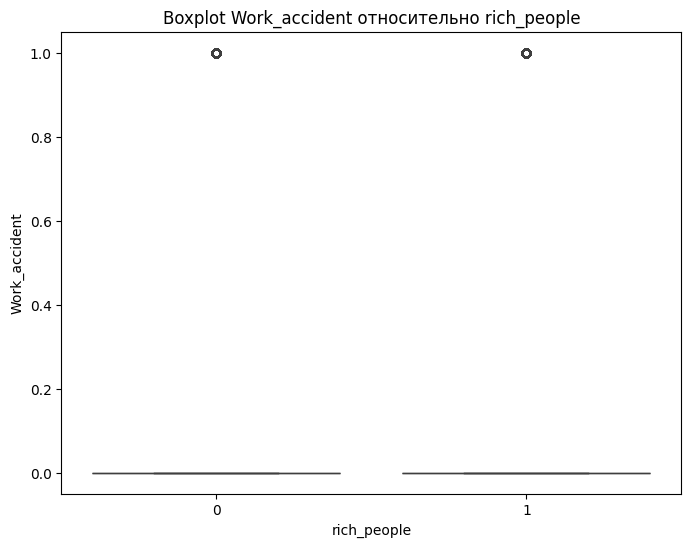

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


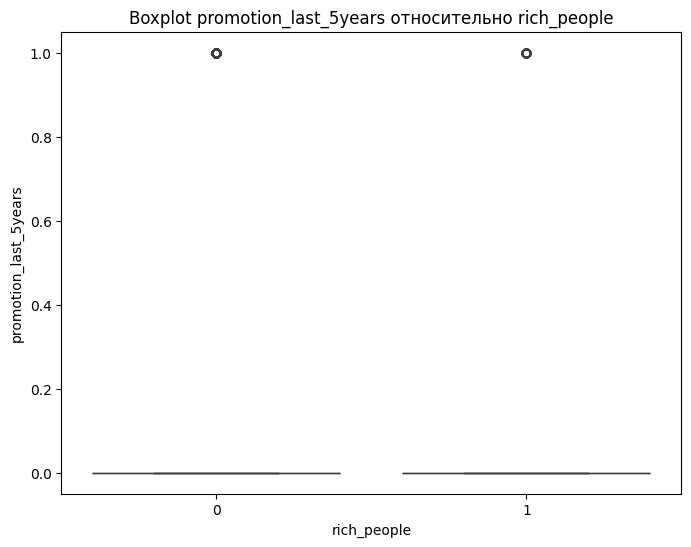

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


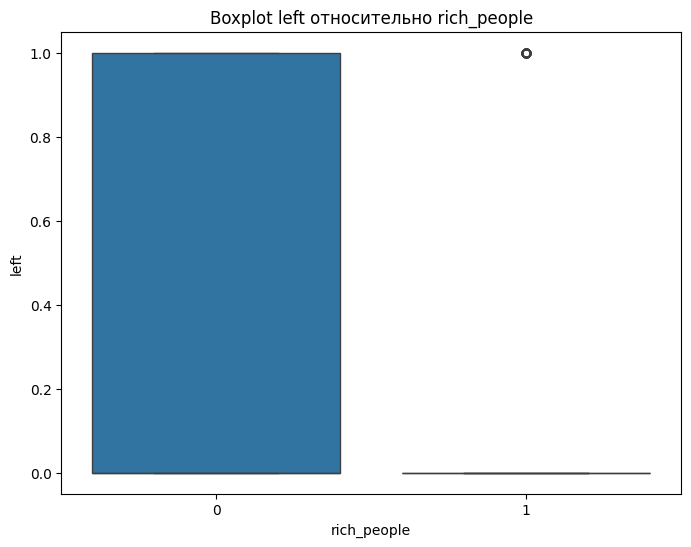

In [ ]:
# Построение boxplot для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='rich_people', y=col, data=df)
    plt.title(f'Boxplot {col} относительно rich_people')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

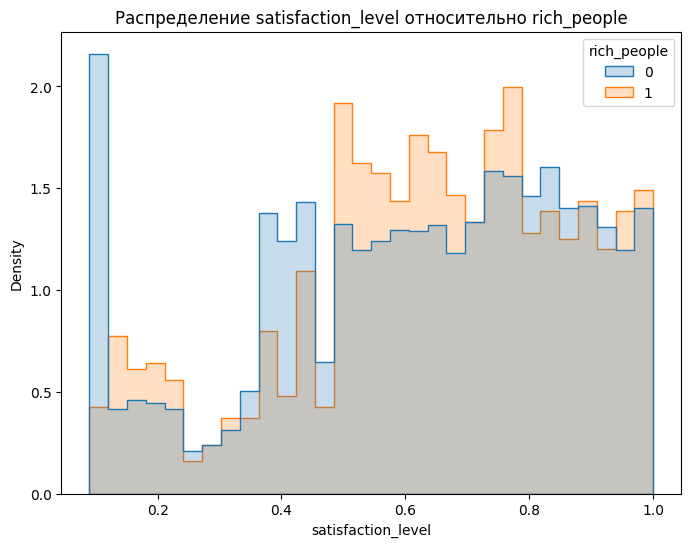

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

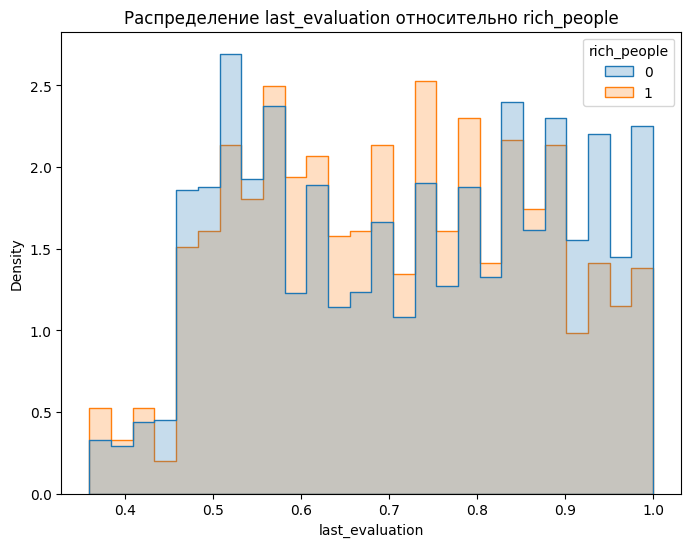

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

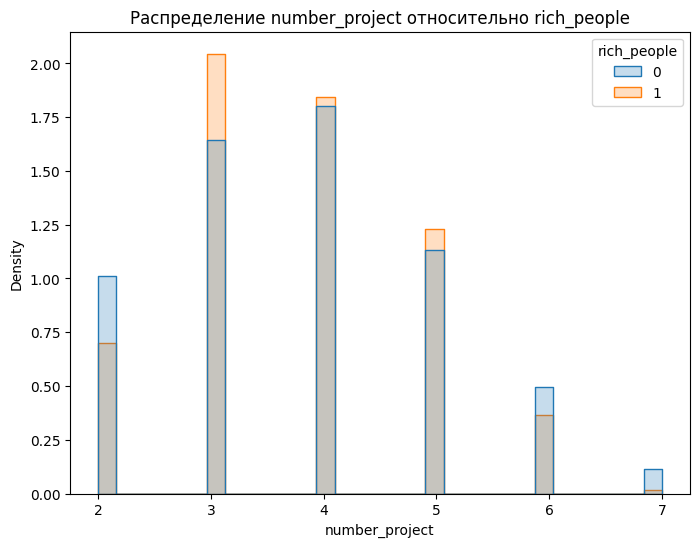

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

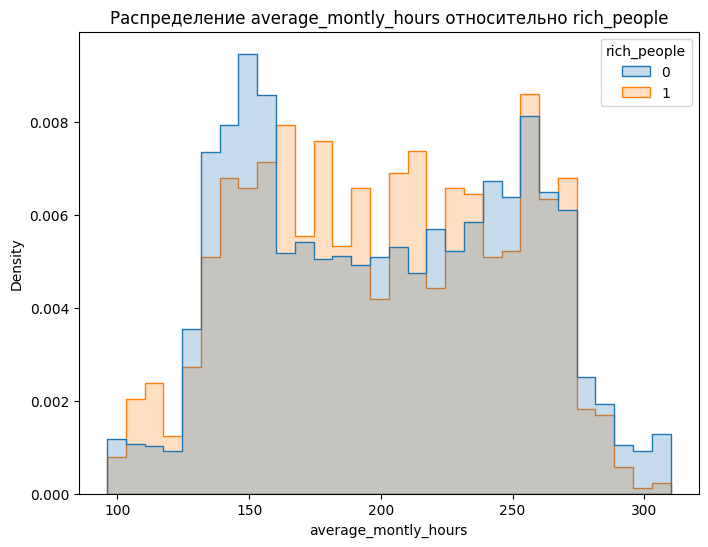

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

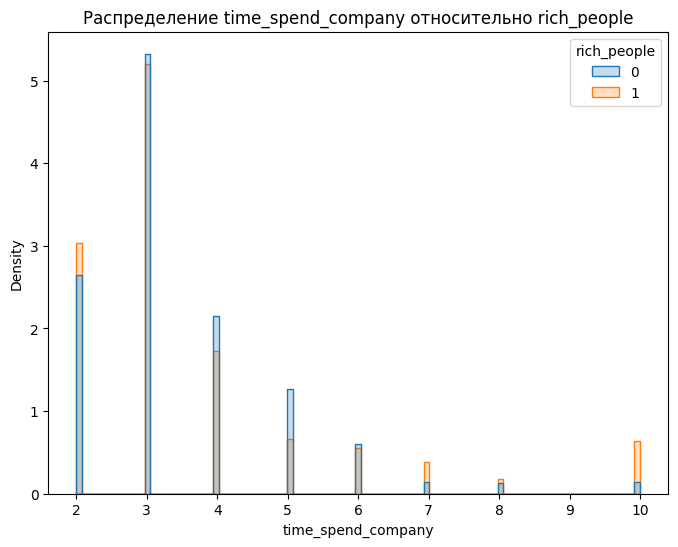

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

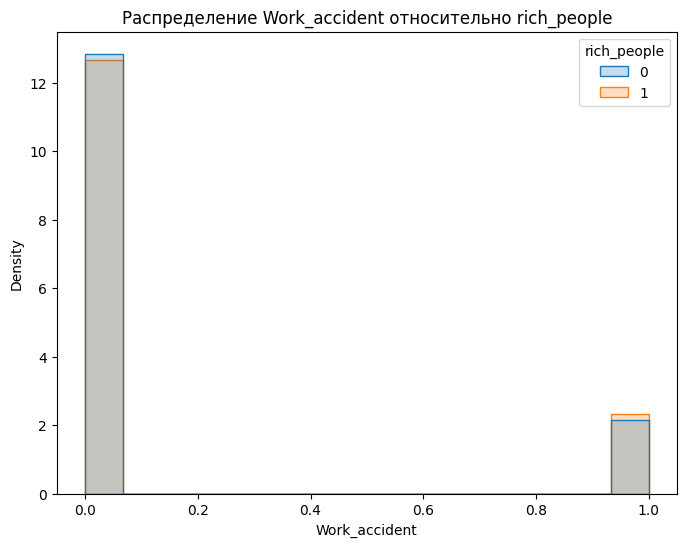

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

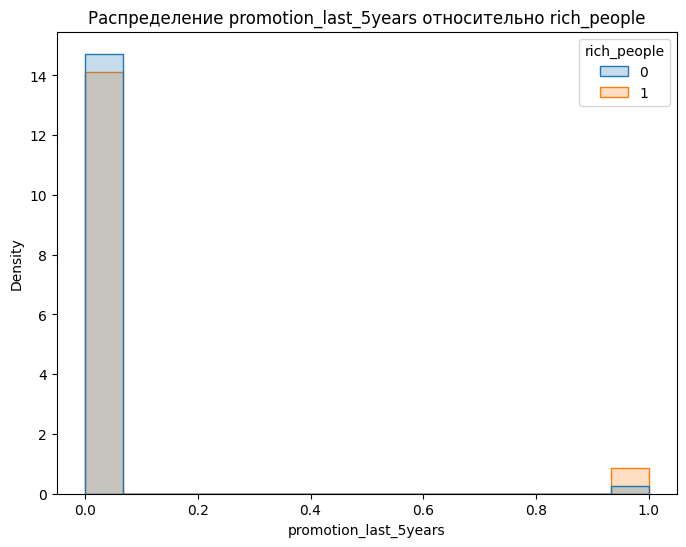

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

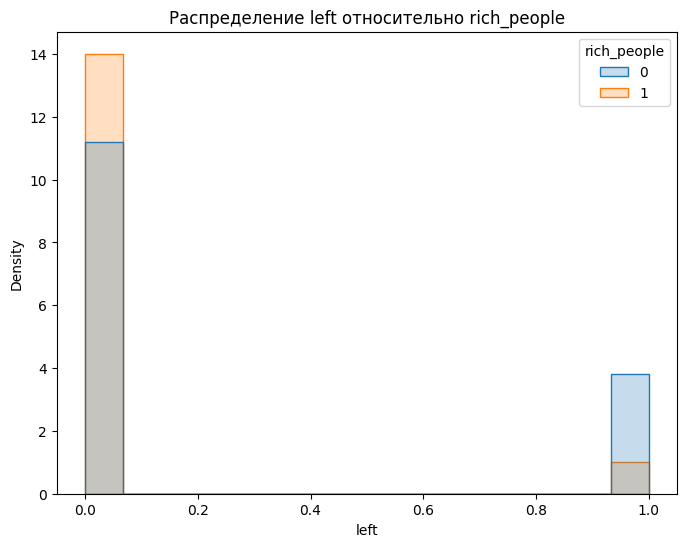

In [ ]:
# Построение диаграмм распределения для каждой переменной
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='rich_people', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно rich_people')
    plt.show()

\⏰ На боксплотах видно что разница у показателей в основном отсутствует, либо незначительно, как например небольшая разница между медианами и квантилями с удовлетворенностью и увольнениями.На гистограммах также не наблюдаются особо сильные различия, что говорит о том что показатели не зависят друг от друга(разве что возможно удовлетворенность зависит)

In [31]:
# Описательная статистика для числовых переменных, разделенная по целевой переменной
desc_stats_numeric = df.groupby('rich_people')[df.select_dtypes(include=[np.number]).columns].describe()

# Описательная статистика для категориальных переменных, разделенная по целевой переменной
desc_stats_categorical = df.groupby('rich_people')[df.select_dtypes(include=['object']).columns].describe()

### Описание полученных результатов
⏰ ```Необходимо сделать подобное описание для своих переменных```

In [32]:
# Проходим по каждой числовой переменной и выводим статистику отдельно
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('rich_people')[col].describe())
    print("\n" + "="*50 + "\n")


Описательная статистика для satisfaction_level:

               count      mean       std   min   25%   50%   75%  max
rich_people                                                          
0            13762.0  0.610619  0.250389  0.09  0.43  0.64  0.82  1.0
1             1237.0  0.637470  0.226791  0.09  0.50  0.66  0.81  1.0


Описательная статистика для last_evaluation:

               count      mean       std   min   25%   50%   75%  max
rich_people                                                          
0            13762.0  0.717160  0.172219  0.36  0.56  0.72  0.87  1.0
1             1237.0  0.704325  0.158608  0.36  0.57  0.70  0.84  1.0


Описательная статистика для number_project:

               count      mean       std  min  25%  50%  75%  max
rich_people                                                      
0            13762.0  3.806278  1.244698  2.0  3.0  4.0  5.0  7.0
1             1237.0  3.767179  1.088684  2.0  3.0  4.0  5.0  7.0


Описательная статистика для av

In [33]:
print("\nКатегориальные переменные:")
desc_stats_categorical


Категориальные переменные:


department                     salary                   
                 count unique    top  freq  count unique   top  freq
rich_people                                                         
0                13762     10  sales  3871  13762      2   low  7316
1                 1237     10  sales   269   1237      1  high  1237

#### 1. **satisfaction_level**:
   - Среднее значение удовлетваренности у людей с высокой зарплатой(rich_people = 1) состовляет 0,63 что чуть выше, чем у людей с низкой и средней зарплатой, где среднее значение равно 0,61.
   - Стандартное отклонение ниже у богатых, что может означать меньшее разнообразие удовлетворенности в этой группе.

#### 2. **last_evaluation**:
   - Средние оценки у богатых (0.704) немного ниже, чем у небогатых (0.717).
   - Однако, стандартное отклонение оценок у богатых ниже (0.158), что говорит о большей стабильности в результатах их труда, тогда как у небогатых результаты более разнообразные.

#### 3. **number_project**:
   - Для обеих групп медиана количества проектов равна 4, что указывает на то, что в среднем сотрудники ведут по 4 проекта.
   - Оба класса имеют почти одинаковое среднее количество проектов, но у небогатых сотрудников разброс выше (стандартное отклонение 1.24 против 1.08 у богатых).

#### 4. **average_montly_hours**:
   - Среднее количество отработанных часов за месяц практически одинаково для обеих групп (201 и 199 часов соответственно), что указывает на схожий рабочий график.
   - Однако, меньший разброс (стандартное отклонение) у богатых (47.7 против 50.1 у небогатых) может говорить о более равномерной нагрузке среди богатых сотрудников. У небогатых сотрудников есть большее расхождение в часах — кто-то работает больше, а кто-то меньше среднего.
#### 5. **time_spend_company**:
   - Богатые сотрудники в среднем работают в компании дольше (3.69 года против 3.48 у небогатых).
   - У богатых сотрудников стандартное отклонение намного выше (1.98 против 1.40 у небогатых), что говорит о более разнообразном стаже: среди них могут быть как новички, так и сотрудники с большим стажем.

#### 6. **Work_accident**:
   - Частота несчастных случаев немного выше среди богатых сотрудников (15.5% против 14.4% у небогатых). Это различие может указывать на то, что богатые сотрудники выполняют более рискованные задачи, либо это просто случайная закономерность.
#### 7. **promotion_last_5years**:
   - Более оплачиваемые сотрудники значительно чаще получают повышения (5.8% против 1.8% у небогатых). Это может свидетельствовать о том, что их высокая заработная плата есть следствие из частых повышений.
#### 8. **department**:
   - Лучшие вина имеют **меньшую плотность** в среднем (0.993 против 0.995), что может свидетельствовать о лучшем качестве.
   - Стандартное отклонение плотности невелико, а диапазон значений у обоих классов вин узкий, что указывает на стабильность этого показателя.

#### 9. **left**:
   - Среди небогатых сотрудников процент тех, кто покинул компанию, гораздо выше (25.4% против 6.6% у богатых). Это важное наблюдение, которое говорит о том, что небогатые сотрудники менее лояльны к компании и более склонны к увольнениям.

### Вывод:
- богатые сотрудники в среднем более удовлетворены своей работой и реже покидают компанию, что может свидетельствовать о том, что материальная обеспеченность способствует большей лояльности и комфорту на рабочем месте.

- у богатых сотрудников больше получение повышений, что может быть следствием успешной профессиональной деятельности.

- несмотря на то, что богатые и небогатые сотрудники работают примерно одинаковое количество часов и над схожим количеством проектов, разброс в нагрузке и результатах у небогатых выше. Это может говорить о том, что среди них больше вариативности в условиях работы — кто-то может быть перегружен, а кто-то недогружен.

- богатые сотрудники в среднем работают в компании дольше, но разброс по стажу в этой группе выше, что может говорить о том, что среди них есть как опытные, так и новые сотрудники.

## 2. Расчет теста Пирсона

### **Описание:**
Вы рассчитаете коэффициенты корреляции Пирсона между Y и каждым из признаков X, чтобы оценить значимость этих корреляций.

### **Шаги:**

1. **Рассчитайте коэффициенты корреляции Пирсона для каждого признака:**

In [34]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,rich_people
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,0.029708
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,-0.020628
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,-0.008726
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,-0.007101
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,0.039953
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,0.009040
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,0.076756
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,-0.120929
rich_people,0.029708,-0.020628,-0.008726,-0.007101,0.039953,0.009040,0.076756,-0.120929,1.000000


2. ⏰ **Интерпретируйте результаты:**


### Интерпретация:
- **Коэффициент корреляции Пирсона** показывает степень линейной связи между двумя переменными.

### Описание корреляций для значимых признаков:



### 1. satisfaction_level :

 - left: Коэффициент -0.388, что указывает на умеренно сильную отрицательную корреляцию. Это говорит о том, что чем ниже уровень удовлетворенности, тем выше вероятность того, что сотрудник покинет компанию.
 - number_project: Коэффициент -0.143, что указывает на слабую отрицательную корреляцию. С ростом числа проектов удовлетворенность сотрудников несколько снижается.
 - time_spend_company: Коэффициент -0.101, что указывает на слабую отрицательную корреляцию. Долгий стаж работы может немного снижать удовлетворенность.
 - Все остальные корреляции довольно слабые, их можно не считать значимыми.
### 2. last_evaluation:

 - number_project: Коэффициент 0.349, что указывает на умеренную положительную корреляцию. Это означает, что сотрудники, которым дают больше проектов, обычно получают больше повышений.
 - average_montly_hours: Коэффициент 0.340, что также указывает на умеренную положительную корреляцию. Сотрудники, которые работают больше часов в месяц, имеют тенденцию получать больше повышений.
 - time_spend_company: Коэффициент 0.132, что указывает на слабую положительную корреляцию, т.е. сотрудники с большим стажем могут получать немного больше повышений.

### 3. number_project:

 - average_montly_hours: Коэффициент 0.417, что указывает на умеренно сильную положительную корреляцию. Сотрудники, которые выполняют больше проектов, также работают больше часов в месяц.
 - time_spend_company: Коэффициент 0.197, что указывает на слабую положительную корреляцию. Новые сотрудники, как правило, ведут больше проектов.
### 4. average_montly_hours:

 - number_project: Коэффициент 0.417 (ранее рассмотрено).
Другие корреляции с этим параметром довольно слабые и незначительные.

### 5. time_spend_company:

 - left : Коэффициент 0.145, что указывает на слабую положительную корреляцию. Новые сотрудники немного чаще уходят из компании.
 - Остальные корреляции с этой переменной слабы.
### 6. Work_accident:

 - left: Коэффициент -0.155, что указывает на слабую отрицательную корреляцию. Это означает, что сотрудники, которые попадают в несчастные случаи на работе, реже уходят из компании, возможно из-за компенсаций или изменений в их рабочем положении.
 - Другие корреляции незначительны.
### 7. promotion_last_5years:

 - left : Коэффициент -0.062, что указывает на слабую отрицательную корреляцию. Это может означать, что сотрудники, получившие повышение, немного реже покидают компанию.
 - rich_people: Коэффициент 0.077, что указывает на слабую положительную корреляцию. Более оплачиваемые сотрудники чаще получают повышения.
### 8. left:

 - satisfaction_level: Коэффициент -0.388, уже обсуждалось ранее, это самая сильная связь.
 - Work_accident: Коэффициент -0.155, уже обсуждалось.
 - time_spend_company: Коэффициент 0.145, что показывает, что новые сотрудники немного чаще уходят.
 - average_montly_hours: Коэффициент 0.071, что указывает на слабую положительную корреляцию, т.е. сотрудники с чуть большими рабочими часами немного чаще уходят.
### 9. rich_people:

 - promotion_last_5years: Коэффициент 0.077, что указывает на слабую положительную корреляцию, т.е. оплачиваем сотрудники чаще получают повышения.
 - left: Коэффициент -0.121, что указывает на слабую отрицательную корреляцию, то есть оплачиваемые сотрудники реже покидают компанию.

### Заключение:
 - Самая сильная корреляция наблюдается между количеством проектов и среднемесячными часами работы (0.417). Это логично, поскольку сотрудники, ведущие больше проектов, тратят на них больше времени.
 - Значительная отрицательная корреляция между уровнем удовлетворенности и уходом с работы (-0.388) указывает на важность удовлетворенности в удержании сотрудников. Сотрудники с низким уровнем удовлетворенности более склонны покидать компанию.
 - Взаимосвязь между переменными относительно слабая, за исключением нескольких умеренных корреляций (например, между повышениями, количеством проектов и рабочими часами), что говорит о том, что в этих данных нет сильных линейных зависимостей между переменными.

### Почему мультиколлинеарность это плохо?

Мультиколлинеарность возникает, когда два или более независимых признака сильно коррелируют друг с другом. Это приводит к нескольким проблемам:

1. **Переоценка значимости признаков**:
   - Когда признаки сильно коррелированы, модель может "перепутать" влияние каждого из них на целевую переменную, что приведет к ненадежным коэффициентам. Это затрудняет интерпретацию модели, поскольку сложно понять, какой из признаков действительно важен.

2. **Нестабильность модели**:
   - При наличии мультиколлинеарности небольшие изменения в данных могут привести к большим изменениям в коэффициентах модели. Это делает модель нестабильной и менее устойчивой.

3. **Затруднение выбора значимых признаков**:
   - Модель может затрудняться при выделении важности отдельных признаков, если они сильно связаны друг с другом. Это может усложнить процесс отбора признаков и снизить точность модели.

4. **Увеличение дисперсии коэффициентов**:
   - Мультиколлинеарность увеличивает дисперсию оценок коэффициентов регрессии, что делает их менее надежными. В результате, некоторые признаки могут казаться незначимыми, хотя на самом деле они играют важную роль.

## 3. Немного машинного обучения

- отберем признаки (числовые и категориальные отдельно)
- обработаем числовые и категориальыне
- обучим модель
- узнаем что влияет на Y

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [36]:
# Выбираем категориальные признаки
categorical_features = X.select_dtypes(include=['object', 'int64']).columns.tolist()

print("Категориальные признаки:", categorical_features)


Категориальные признаки: ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department', 'left']


In [37]:
# Создаем копию данных
X_processed = X.copy()

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=categorical_features, drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.


In [38]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,average_montly_hours_97,average_montly_hours_98,average_montly_hours_99,...,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,left_1
0,0.38,0.53,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,0.80,0.86,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0.11,0.88,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.72,0.87,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.37,0.52,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
14995,0.37,0.48,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
14996,0.37,0.53,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
14997,0.11,0.96,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [39]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

print("Числовые признаки:", numeric_features)

Числовые признаки: ['satisfaction_level', 'last_evaluation']


In [40]:
# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [41]:
X_processed

,satisfaction_level,last_evaluation,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,average_montly_hours_97,average_montly_hours_98,average_montly_hours_99,...,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,left_1
0,0.318681,0.265625,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,0.780220,0.781250,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,0.021978,0.812500,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.692308,0.796875,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,0.307692,0.250000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
14995,0.307692,0.187500,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
14996,0.307692,0.265625,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
14997,0.021978,0.937500,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


### Шаг 3: Объяснение логистической регрессии


Логистическая регрессия — это статистический метод для анализа набора данных, в котором одна или более независимых переменных определяют исход (зависимую переменную), которая является бинарной (т.е. принимает только два возможных значения, например, 0 и 1). Целью логистической регрессии является нахождение наилучшей модели, описывающей связь между независимыми переменными и вероятностью определенного исхода.

Основные характеристики:

Функция логита (логистическая функция): Используется для моделирования вероятности принадлежности наблюдения к определенному классу.
Выводы о влиянии признаков: Коэффициенты модели показывают, как изменение признака влияет на логарифм отношения шансов.

**Функция для обучения и оценки модели**

In [42]:
def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model


In [43]:
# Обучение модели
model = train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9211
Точность на тестовой выборке: 0.9210

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2753
           1       0.69      0.07      0.13       247

    accuracy                           0.92      3000
   macro avg       0.81      0.53      0.55      3000
weighted avg       0.90      0.92      0.89      3000



**Пояснение:**

- Точность (Accuracy): Доля правильных предсказаний от общего числа предсказаний.
- Precision (Точность): Доля правильных положительных предсказаний среди всех положительных предсказаний.
- Recall (Полнота): Доля правильно предсказанных положительных случаев среди всех реальных положительных случаев.
- F1-score: Гармоническое среднее между точностью и полнотой.

In [44]:
# Получение коэффициентов модели
coefficients = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': model.coef_[0]
})

# Сортировка по абсолютному значению коэффициента
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

print(coefficients[['Feature', 'Coefficient']])


                      Feature  Coefficient
233     department_management     1.733794
239                    left_1    -1.481628
160  average_montly_hours_250    -1.186959
84   average_montly_hours_174    -1.153393
93   average_montly_hours_183    -1.142680
..                        ...          ...
34   average_montly_hours_124    -0.007564
60   average_montly_hours_150     0.007210
83   average_montly_hours_173     0.007016
4            number_project_5     0.004226
70   average_montly_hours_160     0.001794

[240 rows x 2 columns]


**Пояснение:**

- Коэффициенты показывают влияние признака на вероятность принадлежности к классу 1 (лучшие вина).
- Положительный коэффициент: Увеличение признака повышает вероятность принадлежности к классу 1.
- Отрицательный коэффициент: Увеличение признака снижает вероятность принадлежности к классу 1.

## 4. Построение модели логистической регрессии для предсказания качества вина

- **Модель логистической регрессии успешно обучена для предсказания лучших вин.**
- **Точность на обучающей и тестовой выборках высока, что указывает на хорошую способность модели обобщать данные.**
- **Анализ коэффициентов показал, какие признаки наиболее влияют на качество вина:**
  - **Содержание алкоголя и сульфатов положительно влияют на качество.**
  - **Плотность и летучая кислотность отрицательно влияют на качество.**
- **Преобразование категориальных признаков и нормализация числовых признаков улучшили качество модели и упростили интерпретацию результатов.**


### 4.1 Кросс-валидация модели

In [45]:
from sklearn.model_selection import cross_val_score

# Кросс-валидация с 5 фолдами
scores = cross_val_score(model, X_processed, Y, cv=5, scoring='accuracy')

print(f"Средняя точность при кросс-валидации: {scores.mean():.4f}")
print(f"Отклонение точности: {scores.std():.4f}")

Средняя точность при кросс-валидации: 0.9196
Отклонение точности: 0.0046


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42, stratify=Y)

### 4.2 Построение ROC-кривой

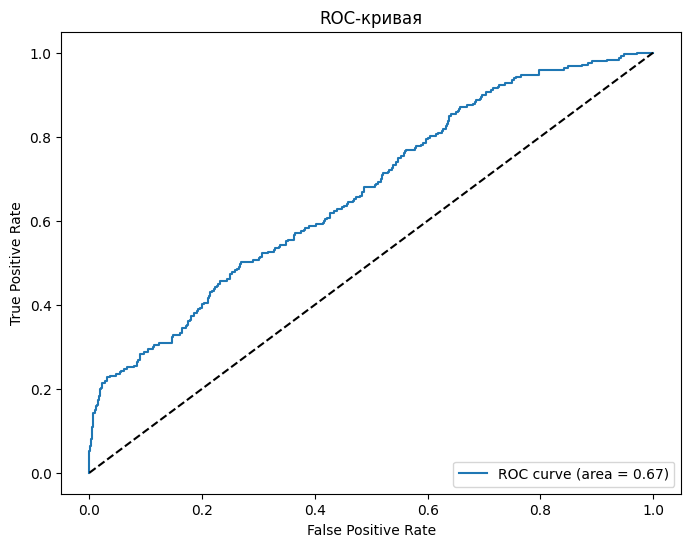

In [47]:
from sklearn.metrics import roc_curve, auc

# Предсказания вероятностей для тестовой выборки
Y_test_prob = model.predict_proba(X_test)[:, 1]

# Расчет ROC-кривой
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_prob)
roc_auc = auc(fpr, tpr)

# Построение графика
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

## ⏰ Доп задание

Изучить различные метрики качества классификационных моделей и понять, в каких ситуациях они наиболее информативны.

**Метрики для исследования:**
- Accuracy (Точность)
- Precision (Точность)
- Recall (Полнота)
- F1 Score
- ROC-AUC
- Log Loss

**Попробовать другие модели и сравнить результат метрик**

**Попробовать другие методы отбора признаков**

**Использовать параметры модели и исследовать влияние на предсказание**

## Заключение

Мы успешно построили модель логистической регрессии для предсказания лучших вин на основе химических характеристик. Преобразование данных и анализ коэффициентов модели позволили нам понять влияние различных признаков на качество вина.


---

# Примечания

- **Логистическая регрессия** является мощным инструментом для бинарной классификации и позволяет интерпретировать результаты через коэффициенты модели.
- **Преобразование категориальных признаков** (One-Hot Encoding) и **нормализация числовых признаков** являются стандартными шагами предобработки данных для многих алгоритмов машинного обучения.
- **Анализ коэффициентов модели** помогает понять, какие признаки наиболее значимы и как они влияют на предсказания.

---

# Дополнительная литература

- **Логистическая регрессия:**
  - [Документация scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- **Предобработка данных:**
  - [One-Hot Encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
  - [Min-Max Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- **Метрики качества модели:**
  - [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
  - [ROC-кривая и AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

---